
# ¿Qué características determinan el precio de un alquiler de Airbnb?


## Introduccion 

**Contexto de Negocio**. Airbnb es un enorme mercado en línea para que la gente común alquile lugares para quedarse. Es un mercado grande y lucrativo, pero muchos proveedores son simplemente personas que alquilan su propia residencia principal para visitas breves. Incluso los proveedores más grandes suelen ser pequeñas empresas con solo una pequeña cantidad de lugares para alquilar. Como resultado, tienen una capacidad limitada para evaluar tendencias a gran escala y establecer precios óptimos.

Airbnb ha lanzado un nuevo servicio para ayudar a los listers a establecer precios. Airbnb obtiene una comisión porcentual de los listados, por lo que se les incentiva a ayudar a los anunciantes a fijar precios de manera óptima; es decir, en el punto máximo posible en el que aún cerrarán un trato. Eres un consultor de Airbnb que ayuda con este nuevo servicio de precios.

**Problema de Negocio**. "¿Qué características son más relevantes para el precio de un anuncio de Airbnb?"

**Contexto analitico**. Usaremos el conjunto de datos con buena calidad y creado por el grupo de defensa Inside Airbnb. Nos centraremos en los listados en la ciudad de Nueva York durante el último año, aprovechando conjuntos de datos más grandes cuando haya detalles importantes para explorar.

El caso está estructurado de la siguiente manera: 

1. haremos una exploración básica de datos trazando distribuciones de cantidades clave; 

2. introducir el concepto de correlación para encontrar las características clave; 

3. introducir la idea de efectos de interacción para corregir los efectos de características clave; 

4. discutir cómo generar hipótesis iterativamente y elegir visualizaciones de datos para respaldar sus conclusiones; 

5. Observe un tipo muy específico de efecto de interacción, el efecto temporal y cómo corregirlo; y finalmente 

6. juntar todo para identificar los factores clave que afectan el precio.

In [38]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics


import folium  #needed for interactive map
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()

# 1. Exploracion básica de la data

Comenzamos cargando los datos y mirando su forma básica:

In [3]:
import csv

with open('airbnb_nyc.csv') as File:  
    reader = csv.reader(File)

In [4]:
df_rbnb = pd.read_csv("airbnb_nyc.csv")
 
df_rbnb

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In [5]:
listings = pd.read_csv('airbnb_nyc.csv', delimiter=',')
print(listings.shape)
listings.head(10)

(30179, 81)


,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,11943,Country space in the city,NaN,Ditmas Park. Entire 3rd floor. 2 large rooms ...,none,NaN,NaN,"No smoking, no cooking on 3rd floor",45445,40098.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
7,12627,Entire apartment in central Brooklyn neighborh...,My place is close to Prospect Park and you’ll...,My place is close to Prospect Park and you’ll...,none,"Steps from Beautiful Prospect Park, Zoo, Brook...","NYC Subway lines Q, B, and S to Prospect Park....",NaN,49670,40115.0,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
8,13050,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...","Wonderfully bright, comfortable, and stylish, ...",none,The Putnam-Throop area of Bed-Stuy is a vibran...,"Three useful buses (26, 52, 43) are three or f...","Absolutely, positively NO smoking, either insi...",50846,40119.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
9,14322,Beautiful Apartment in Manhattan!!!,"You will find a welcoming apartment, I love to...","You will find a welcoming apartment, I love to...",none,"They are very private, so please respect their...","You have trains N/R/6 and buses(on 2av, 3ave 2...",Cleaning fee is required. NO SHOES USED IN THE...,56284,40138.0,...,1,1,-1,1,-1,-1,-1,-1,-1,-1


In [6]:
listings.shape

(30179, 81)

In [7]:
listings.columns 

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


In [8]:
# Obtengamos algun overview de los datos
pd.options.display.max_columns = 100
listings.head(100)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,1.0,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,20,4

Los siguientes son detalles sobre algunas de las columnas importantes aquí:

1. ```neighbourhood```:  el barrio/neighborhood donde esta la propiedad
2. ```longitude```, ```latitude```: longitud y latitud
3. ```property_type```: tipo de propiedad como apartamento, condominio, etc
4. ```bathrooms```: numero de baños
5. ```bedrooms```: numero de camas
6. ```price```:  precio del lugar
7. ```number_of_reviews```: numero de reviews dados por los clientes que han estado en la propiedad
8. ```parking```: 1 indica que si hay parking, -1 lo contrario

Para variables categoricas, como ```outdoor_friendly```, ```gym```, etc., el 1,-1 se deben interpretar como ```parking```.



# 2 Integración y selección de los datos de interes a analizar 

Como ha visto en los casos de Python, es bueno desarrollar primero una idea de cómo se distribuyen los valores de algunas cantidades clave de interés. Siempre comenzamos a investigar obteniendo una vista general de varios parámetros en nuestros datos. 

Comencemos por hacerlo para algunas variables numéricas, como ```price```, ```bedrooms```, ```bathrooms```, ```number_of_reviews```:



In [9]:
listings[['price','bedrooms','bathrooms','number_of_reviews','parking']].describe()

,price,bedrooms,bathrooms,number_of_reviews,parking
count,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889,-0.394877
std,93.151824,0.614659,0.422225,5.265633,0.918749
min,0.000000,1.000000,0.500000,0.000000,-1.000000
25%,65.000000,1.000000,1.000000,0.000000,-1.000000
50%,100.000000,1.000000,1.000000,2.000000,-1.000000
75%,175.000000,1.000000,1.000000,7.000000,1.000000
max,500.000000,11.000000,7.500000,20.000000,1.000000


In [10]:
listings['price'].quantile([0.9,0.95,0.99])

0.90    250.0
0.95    325.0
0.99    450.0
Name: price, dtype: float64

In [11]:
listings['number_of_reviews'].describe()

count    30179.000000
mean         4.459889
std          5.265633
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         20.000000
Name: number_of_reviews, dtype: float64



Histograma de las variables anteriores. Para observar como es la estructura de la grafica en terminos de la forma (e.g. normal, skewed, multi-modal, etc.)?

 

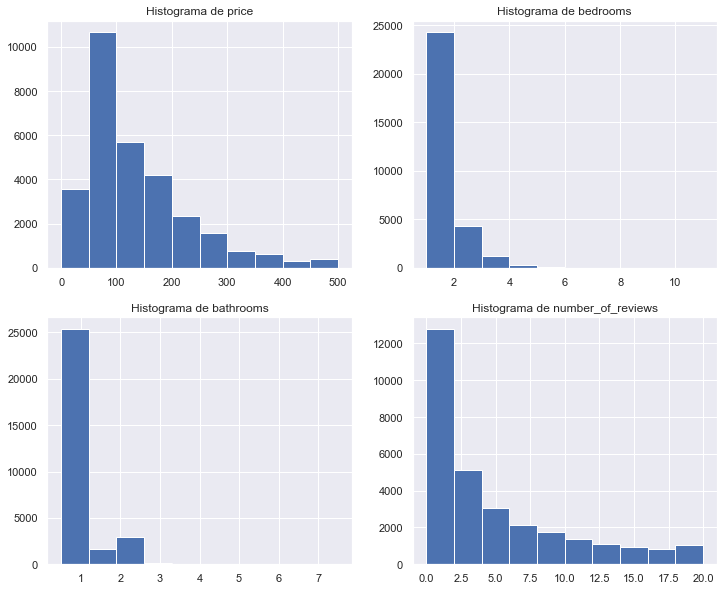

In [12]:
plt.figure(figsize=(12,10))
vars_to_plot = ['price', 'bedrooms','bathrooms','number_of_reviews']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1) # 2 filas dos columnas 
    plt.hist(listings[var],10) # 10 representa el numero de bins 
    title_string = "Histograma de " + var 
    plt.title(title_string)

La variable ```price``` es nototoriamente spiky (puntiaguda). Hay una buena cantidad de precios entre 25 y 300 dólares, con picos muy obvios en números redondos como 50, 100, 150, 200, 250 y 300. Esto probablemente refleja el hecho de que las personas ingresan en los precios que desean proponer, por lo que tienden a elegir números redondos (o números justo debajo de los números redondos).

surge la pregunta: ¿Puede detectar valores atípicos de estos histogramas? Si es así, sugieren (i) error en los datos; o (ii) datos que deberían omitirse de nuestro análisis futuro?

Muy pocos lugares tenían precios de más de $320, por lo que podríamos considerarlos como **valores atípicos**. 

Algunos de estos pueden representar un error, pero se ve que la mayoría de ellos son correctos: los hoteles en Nueva York ciertamente cuestan más de 400 dólares la noche, por lo que no es descabellado esperar algunos listados de Airbnb de este precio. 

La cuestión de si debemos omitir estos valores atípicos, aqui es una buena medida, ya que nos pondria mucho ruido de variables en el analisis final. Ademas, por otra parte, si estos precios son correctos, se rigen por factores idiosincrásicos que no son tan relevantes para los listados que la mayoría de nuestros clientes están interesados en analizar. Por lo tanto, tenderán a darnos resultados sesgados o "engañosos", llegando a la misma conclusion: omitir quellos valores atipicos.



***Otra forma de mostrar el histograma de numero de camas***

A veces, es mejor mirar un histograma que traza los porcentajes <i>relativos</i> de valores en todas las categorías:

--------------------------------------
Counter({1: 24254, 2: 4321, 3: 1241, 4: 279, 5: 62, 6: 14, 7: 4, 8: 3, 11: 1})
--------------------------------------
        0
11      1
8       3
7       4
6      14
5      62
4     279
3    1241
2    4321
1   24254
--------------------------------------
            0
11   0.003314
8    0.009941
7    0.013254
6    0.046390
5    0.205441
4    0.924484
3    4.112131
2   14.317903
1   80.367143
--------------------------------------
            0
1   80.367143
2   14.317903
3    4.112131
4    0.924484
5    0.205441
6    0.046390
7    0.013254
8    0.009941
11   0.003314


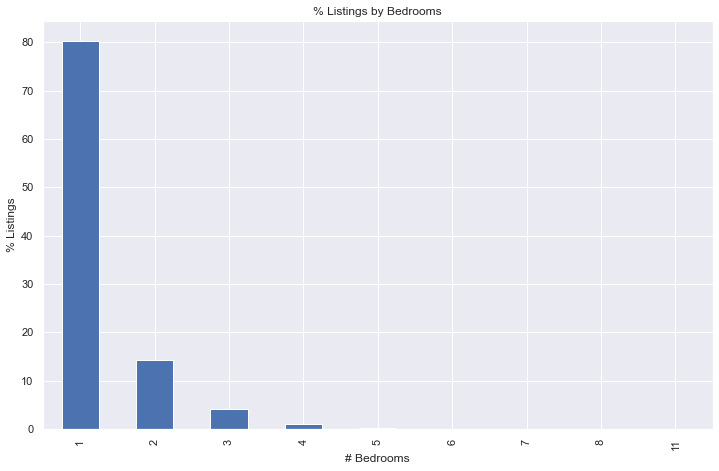

Percent of 1 Bedroom Listings: %80.37


In [13]:
bedrooms_counts = Counter(listings.bedrooms)
print('--------------------------------------')
print(bedrooms_counts)

tdf =pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
print('--------------------------------------')
print(tdf)
tdf = (tdf.iloc[-10:, :] / len(listings)) * 100
print('--------------------------------------')
print(tdf)

# Ordenar el dataframe por el numero
tdf.sort_index(axis = 0, ascending = True, inplace = True)
tdf
print('--------------------------------------')
print(tdf)

ax = tdf.plot(kind = 'bar', figsize = (12, 7.5))
ax.set_xlabel("# Bedrooms")
ax.set_ylabel("% Listings")
ax.set_title('% Listings by Bedrooms')
ax.legend_.remove()
plt.show()
print("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1])) 

# 3. Limpieza de datos 

In [39]:
# Detectamos los valores nulos 
df_rbnb.isnull()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,False,False,

In [41]:
# 2. Compruebe si faltan datos
 # Si desea verificar el número de datos que faltan en cada columna, usar el siguiente código es la forma más rápida.
 # Le permite comprender mejor qué columnas tienen más datos faltantes, a fin de determinar cómo realizar las próximas operaciones de limpieza y análisis de datos.
 
df_rbnb.isnull().sum().sort_values(ascending=False)

house_rules              13556
host_response_time       13097
host_response_rate       13097
neighborhood_overview    12066
transit                  11989
                         ...  
number_of_reviews            0
number_of_reviews_ltm        0
instant_bookable             0
cancellation_policy          0
event_suitable               0
Length: 81, dtype: int64

In [44]:
# Despues de analizar si se "borrar" o no los valores nulos, opto por ssi "borrarlos" 
#ya que la base datos es grande y se puede borrar la fila para que no cree un ruido posterior en el analisis z 
df_rbnb1=df_rbnb.dropna(how='any')
df_rbnb1=df_rbnb.dropna(how='all')
 
df_rbnb.dropna(thresh = 6 )

df_rbnb1

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.00,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.00,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.00,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,1.00,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,

# 4 y 5  Analisis de los datos y graficas de analisis  

## Inspeccionando el precio vs variables de interes

Ahora que hemos analizado las variables de interés de forma aislada, tiene sentido analizarlas en relación con el precio.


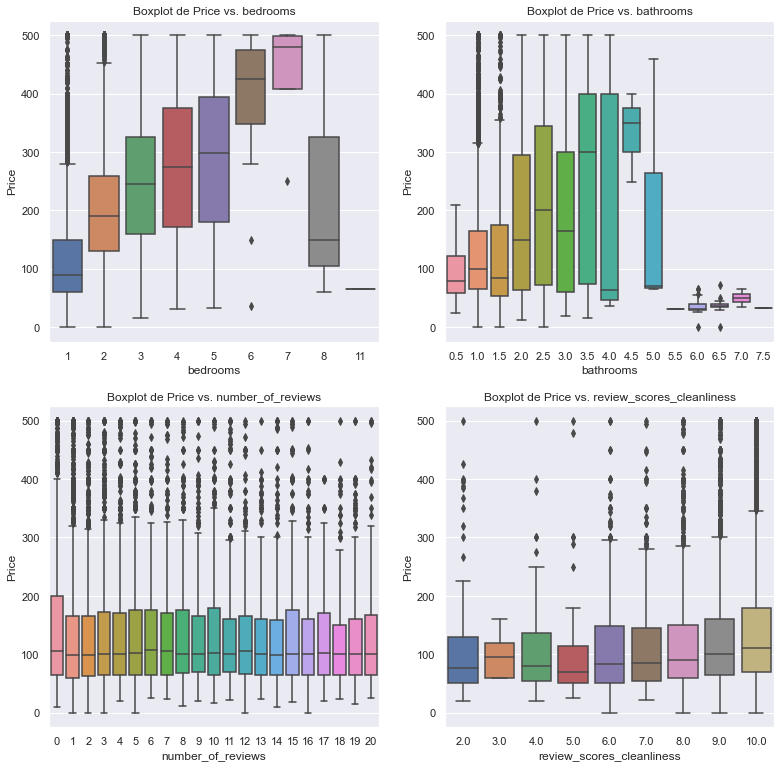

In [14]:
plt.figure(figsize=(13,13))
vars_to_plot = ['bedrooms','bathrooms','number_of_reviews','review_scores_cleanliness']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1) # Figura 2 filas y 2 columnas
    sns.boxplot(x = var, y='price', data = listings)
    title_string = "Boxplot de Price vs. " + var # titulo iterativo
    plt.ylabel("Price")
    plt.title(title_string)



1. Como era de esperar, el precio medio aumenta con la cantidad de dormitorios. Esta relación también parece lineal.
2. Nuevamente, como se esperaba, el precio promedio parece aumentar con el número de baños. Parece haber algunos valores atípicos que desafían esta tendencia.
3. El número de reseñas no parece afectar el precio medio.
4. Parece haber un ligero aumento en el precio medio con un aumento en las puntuaciones de las revisiones de limpieza.



## Investigando correlaciones 


Echemos un vistazo a ```price``` vs. ```bedrooms``` :

Text(0.5, 1.0, 'Boxplot de Price vs. Bedrooms')

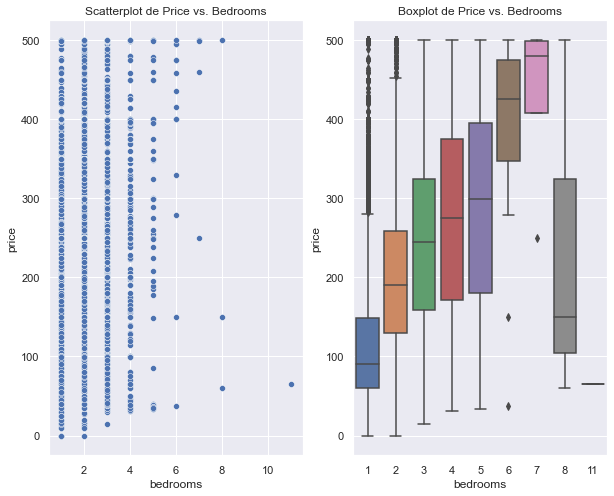

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(x='bedrooms',y = 'price', data = listings)
plt.ylabel("price")
plt.title("Scatterplot de Price vs. Bedrooms")
plt.subplot(122)
sns.boxplot(x='bedrooms',y= 'price', data = listings)
plt.ylabel("price")
plt.title("Boxplot de Price vs. Bedrooms")

Vemos que a medida que aumenta el número de dormitorios, el precio en promedio aumenta. La <b>correlación</b> de cantidades es una forma de capturar esta relación. La correlación de dos cantidades es una medida de cuánto tienden a aumentar juntas, medida en una escala que va de -1 a 1. Una correlación positiva entre el precio y la cantidad de habitaciones indicaría que los listados de precios más altos tienden a tener <i>más</i> dormitorios. De manera similar, una correlación negativa entre el precio y la cantidad de dormitorios indicaría que los listados de precios más altos tienden a tener <i>menos</i> dormitorios. En nuestro caso, podemos ver fácilmente que el precio se correlaciona positivamente con las habitaciones.

Dado que la correlación es solo un número que resume una distribución conjunta completa, puede ser engañosa y no elimina la necesidad de graficar e inspeccionar visualmente las variables clave que sugiere que son importantes. No obstante, es muy útil cuando se busca rápidamente relaciones muy sólidas en los datos y se reduce una lista mucho más amplia de factores potenciales.

In [16]:
np.corrcoef(listings['price'],listings['bedrooms'])[0,1]

0.45453929526270126

***Otra forma de analisis de correlacion***

La [correlation matrix](https://www.displayr.com/what-is-a-correlation-matrix/) da todas las correlaciones por pares entre todas las variables. Podemos obtener una descripción general rápida de las variables clave que afectan el precio mirando su fila en la matriz de correlación.



In [17]:
corr = listings.corr()
corr

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,0.567767,0.530654,0.103325,0.062122,0.071475,-0.351613,-0.005784,0.109353,0.095344,0.041364,0.052900,0.081639,0.027533,0.073860,0.015423,0.000090,NaN,0.275434,0.310207,0.323030,0.241093,-0.099074,0.281097,0.005712,-0.008610,0.051732,-0.026479,-0.046465,0.061172,0.018077,0.370174,0.119937,0.098897,0.111743,0.074851,0.557623,-0.238283,0.053860,0.001858,0.061554,0.073392,0.038773,0.197887,0.087920,0.007983,0.189066,0.179178,0.018486,-0.012869,0.060977,-0.335233,0.093657,0.065741,0.067887,-0.019574,0.004068,0.133459,-0.055286,0.264720,-0.062950,0.143029,0.002802,-0.074635,0.026211
host_id,0.567767,1.000000,0.905404,0.031051,0.002383,0.036721,-0.471233,0.025581,0.128454,0.103469,0.058319,0.055659,0.114607,0.028931,0.093609,0.030244,0.000424,NaN,0.293828,0.333110,0.350964,0.299765,-0.031790,0.191829,-0.082189,-0.089129,-0.001015,-0.084407,-0.105143,-0.016744,-0.063119,0.304739,0.150896,0.125094,0.140272,0.075075,0.431707,-0.149752,0.048199,-0.004128,0.006306,0.015449,0.024602,0.161820,0.024614,0.043710,0.140030,0.106922,-0.043834,-0.013130,0.034135,-0.233112,0.051000,0.008452,0.033211,-0.001314,-0.020248,0.121658,-0.046604,0.164151,-0.051488,0.039264,0.000612,-0.033810,0.014483
host_since,0.530654,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,0.037348,0.021578,0.082001,-0.009671,0.051555,0.000478,-0.003294,NaN,0.239441,0.273200,0.291389,0.242459,-0.052206,0.162810,-0.090009,-0.087586,-0.022991,-0.082780,-0.104489,-0.027066,-0.065790,0.289922,0.144230,0.119375,0.134057,0.077951,0.360644,-0.126710,0.026867,-0.000546,0.003265,0.006753,0.026418,0.137461,0.023077,0.036480,0.115689,0.082969,-0.047184,-0.005512,0.034853,-0.213517,0.033959,0.003663,0.032550,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_response_rate,0.103325,0.031051,0.029362,1.000000,0.133280,0.071515,-0.021462,-0.000586,0.018393,0.067337,0.041781,0.037776,0.046493,0.034280,0.048346,0.012583,-0.002015,NaN,-0.096749,-0.092871,-0.090221,-0.043331,0.101951,0.144492,0.050464,0.047434,0.073322,0.056361,0.064596,0.032622,0.037690,0.130772,0.080812,0.073679,0.041405,0.029622,0.167471,-0.001621,0.036806,0.023568,0.058347,0.047595,0.013415,0.129689,-0.015465,0.019995,0.124320,0.116666,0.024969,-0.015566,0.005100,-0.015891,0.066006,0.065656,0.036693,0.011373,0.074723,0.089964,-0.007350,0.056537,-0.009455,0.112369,-0.043715,0.019444,-0.020509
host_is_superhost,0.062122,0.002383,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,-0.003154,0.022136,0.020835,-0.016325,0.038419,0.065973,0.048219,NaN,0.034459,0.051846,0.062296,0.084598,0.246618,0.278945,0.113434,0.096486,0.118412,0.079193,0.081936,0.047967,0.091963,0.009774,-0.002636,-0.041604,0.199202,-0.016710,0.102082,-0.002945,0.039159,0.012663,0.026205,0.065132,0.017904,0.142496,0.021276,0.027264,0.137013,0.134466,0.007642,-0.051817,-0.027200,-0.003716,0.179669,0.074773,0.091193,-0.01834

In [18]:
corr    = listings.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False)

price                                          1.000000
accommodates                                   0.571541
bedrooms                                       0.454539
beds                                           0.421355
guests_included                                0.321970
tv                                             0.271563
elevator                                       0.229610
calculated_host_listings_count_entire_homes    0.218890
white_goods                                    0.214283
gym                                            0.209892
child_friendly                                 0.206189
air_conditioning                               0.196582
host_listings_count                            0.194891
calculated_host_listings_count                 0.185098
bathrooms                                      0.163276
private_entrance                               0.146453
review_scores_location                         0.140308
coffee_machine                                 0

In [19]:
corr['price'][neg_cor].sort_values()

longitude                                      -0.294196
calculated_host_listings_count_private_rooms   -0.127504
calculated_host_listings_count_shared_rooms    -0.101389
smoking_allowed                                -0.054131
host_greeting                                  -0.051356
number_of_reviews                              -0.029229
host_identity_verified                         -0.022861
parking                                        -0.019383
host_is_superhost                              -0.016325
number_of_reviews_ltm                          -0.011481
host_since                                     -0.009671
review_scores_value                            -0.005942
Name: price, dtype: float64

Del anterior analisis, sorpendende las correlaciones entre (```accommodates```, ```bedrooms```, ```beds```, etc.), pero sorprende aún mas que los puntajes de las Reseñas solo están ligeramente relacionados con el precio. Al observar las puntuaciones relacionadas con la ubicación, encontramos que la longitud está relacionada negativamente con el precio, mientras que la latitud no. Esto nos motiva a trazarlos en un mapa

También notamos algunas correlaciones que son muy interesantes para observar. Por ejemplo:

1. El estacionamiento tiene una correlación negativa con el precio. Esta correlación con el estacionamiento es muy sospechosa: ¿por qué el estacionamiento sería malo? Sospecho que es "falso", causado por el hecho de que el estacionamiento es más común en vecindarios menos costosos. Investiguemos esto observando el estacionamiento de una manera región por región.

2. Ser un SuperAnfitrión tiene una correlación negativa. Ser calificado en buena medida no es un factor de decision.

3. El número total de listados está correlacionado positivamente. Esto parece ir en contra de la intuición, ya que uno querría que los comerciantes a gran escala pudieran alquilar más barato debido a las economías de escala.



## Usar heatmaps para entender la distirbucion del precio con la ubicacion

A continuación, creamos un mapa de calor del precio de los apartamentos en Nueva York. Esto nos dará una idea de dónde están las ubicaciones importantes:

In [31]:
max_amount = float(listings['price'].max())
max_amount

500.0

In [32]:
max_amount = float(listings['price'].max())

folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['price'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

<ipython-input-32-5e290e7361b7>:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['price'])),


In [26]:
max_amount = float(listings['bedrooms'].max())

folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['bedrooms'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

<ipython-input-26-966c3757c4cc>:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['bedrooms'])),


In [27]:
listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.00,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.00,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.00,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,1.00,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,

## Efectos de interaccion y posibles hipotesis(15 min)

Ahora que hemos explorado algunos de los factores que se espera que afecten el precio, centrémonos en comprender las correlaciones inesperadas, como la correlación negativa con el estacionamiento. Empezamos por lo último:

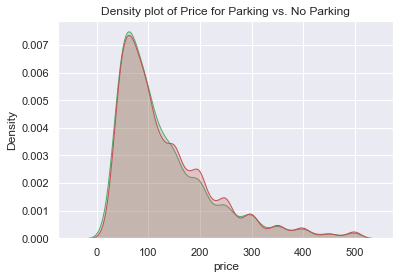

In [45]:

sns.kdeplot(listings.loc[listings['parking'] == 1,'price'],shade = True, label="Parking",color="g")
sns.kdeplot(listings.loc[listings['parking'] == -1,'price'],shade = True, label="No Parking",color="r")
plt.title("Density plot of Price for Parking vs. No Parking");

Vimos antes que la correlación entre precio y estacionamiento es -0.019383. Dado que el estacionamiento es deseable, esperamos que el precio aumente con el estacionamiento. Cuando vemos un patrón como este, debemos sospechar la existencia de **efectos de interacción** que están complicando la relación estacionamiento vs. precio. Los efectos de interacción se dan cuando la relación entre dos variables es **condicional** o depende del valor de una tercera variable oculta.

Le recomendamos encarecidamente que se apoye en su experiencia en el dominio al mirar los datos y realmente explore las correlaciones / relaciones que parecen divertidas, raras o contradictorias. Podemos encontrar efectos de interacción o podemos encontrar que ciertas suposiciones de larga data de nuestra experiencia en el dominio no son correctas (por ejemplo, tal vez el estacionamiento no sea deseable en ciertas partes del mundo).

Entonces, ¿cuál podría ser potencialmente esta tercera variable? Bueno, hemos visto que la ubicación tiene un gran impacto en los precios. ¿Quizás las áreas de precios altos no tienen muchos lugares de estacionamiento, mientras que las áreas de precios bajos sí? No lo sabemos con certeza, pero vale la pena adivinarlo.

Más formalmente, planteamos la hipótesis de que esta correlación negativa observada es el resultado de los efectos de interacción que surgen de la ubicación. Para investigar esta hipótesis, debemos desglosar las ubicaciones por vecindario y ver si esta correlación negativa entre precio y estacionamiento todavía se mantiene dentro de los vecindarios. Los vecindarios son discretos y hay muchos listados por vecindario, por lo que simplemente podemos calcular la correlación para cada vecindario individualmente. Matemáticamente, esto es exactamente lo mismo que condicionar la vecindad y calcular la correlación condicional.

# 6. Conclusiones 

En este caso, vimos que los precios de Airbnb están influenciados por muchos factores. Algunos de los principales incluyen ubicación, fecha, número de dormitorios, número de huéspedes y tipo de propiedad.

Cualquier modelo futuro que construyamos debería incluir estos factores. La incorporación de algunos de estos factores, como el número de dormitorios, debería ser sencilla, ya que tiene una relación grande y casi lineal con el precio. Pero otros, como la ubicación, exhiben relaciones muy no lineales. Aprenderemos a lidiar con este tipo de relaciones complejas en casos futuros.

También encontramos algunas correlaciones sorprendentes, como la correlación negativa entre precio y estacionamiento. Sin embargo, después de desglosar los datos por barrios e incorporar el efecto de interacción de la ubicación, esta correlación negativa desapareció por completo.

Los efectos temporales son un tipo muy específico de efecto de interacción que debe tratarse por separado. Nuestra exploración nos dice que cualquier modelo de precios de AirBnB debe tener en cuenta los fuertes componentes estacionales, así como los fuertes picos alrededor de las principales festividades.